In [129]:
import numpy as np
import pandas as pd
import os

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow import keras

from sequence_addition.data import get_adding_problem_data

In [2]:
def generate_time_series(batch_size, n_steps):
    freq1, freq2, offsets1, offsets2 = np.random.rand(4, batch_size, 1)
    time = np.linspace(0, 1, n_steps)
    series = 0.5 * np.sin((time - offsets1) * (freq1 * 10 + 10))  #   wave 1
    series += 0.2 * np.sin((time - offsets2) * (freq2 * 20 + 20)) # + wave 2
    series += 0.1 * (np.random.rand(batch_size, n_steps) - 0.5)   # + noise
    return series[..., np.newaxis].astype(np.float32)

np.random.seed(1)

n_steps = 50
series = generate_time_series(10000, n_steps + 1)
X_train, y_train = series[:7000, :n_steps], series[:7000, -1]
X_valid, y_valid = series[7000:9000, :n_steps], series[7000:9000, -1]
X_test, y_test = series[9000:, :n_steps], series[9000:, -1]

X_train.shape, y_train.shape

((7000, 50, 1), (7000, 1))

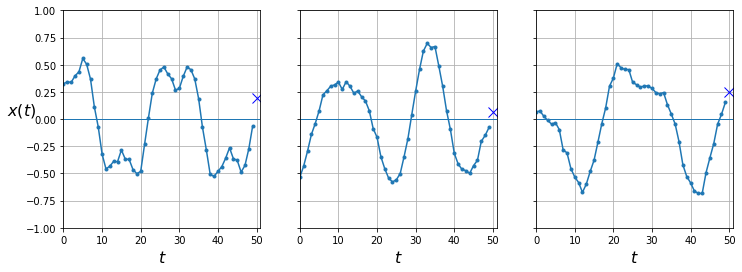

In [3]:


def plot_series(series, y=None, y_pred=None, x_label="$t$", y_label="$x(t)$"):
    plt.plot(series, ".-")
    if y is not None:
        plt.plot(n_steps, y, "bx", markersize=10)
    if y_pred is not None:
        plt.plot(n_steps, y_pred, "ro")
    plt.grid(True)
    if x_label:
        plt.xlabel(x_label, fontsize=16)
    if y_label:
        plt.ylabel(y_label, fontsize=16, rotation=0)
    plt.hlines(0, 0, 100, linewidth=1)
    plt.axis([0, n_steps + 1, -1, 1])

fig, axes = plt.subplots(nrows=1, ncols=3, sharey=True, figsize=(12, 4))
for col in range(3):
    plt.sca(axes[col])
    plot_series(X_valid[col, :, 0], y_valid[col, 0],
                y_label=("$x(t)$" if col==0 else None))

plt.show()



In [4]:
def plot_learning_curves(loss, val_loss):
    plt.plot(np.arange(len(loss)) + 0.5, loss, "b.-", label="Training loss")
    plt.plot(np.arange(len(val_loss)) + 1, val_loss, "r.-", label="Validation loss")
    plt.gca().xaxis.set_major_locator(mpl.ticker.MaxNLocator(integer=True))
    plt.axis([1, 20, 0, 0.05])
    plt.legend(fontsize=14)
    plt.xlabel("Epochs")
    plt.ylabel("Loss")
    plt.grid(True)



In [5]:
np.random.seed(42)
tf.random.set_seed(42)

In [6]:
model = keras.models.Sequential([
    keras.layers.SimpleRNN(5, return_sequences=True, input_shape=[None, 1]),
    keras.layers.SimpleRNN(1)
])

In [7]:
optimizer = keras.optimizers.Adam(learning_rate=0.005)
model.compile(loss="mse", optimizer=optimizer)
history = model.fit(X_train, y_train, epochs=10,
                    validation_data=(X_valid, y_valid))

Epoch 1/10
219/219 [==============================] - 5s 16ms/step - loss: 0.0210 - val_loss: 0.0057
Epoch 2/10
219/219 [==============================] - 3s 14ms/step - loss: 0.0057 - val_loss: 0.0051
Epoch 3/10
219/219 [==============================] - 3s 13ms/step - loss: 0.0053 - val_loss: 0.0049
Epoch 4/10
219/219 [==============================] - 3s 15ms/step - loss: 0.0052 - val_loss: 0.0049
Epoch 5/10
219/219 [==============================] - 3s 15ms/step - loss: 0.0051 - val_loss: 0.0047
Epoch 6/10
219/219 [==============================] - 4s 17ms/step - loss: 0.0051 - val_loss: 0.0047
Epoch 7/10
219/219 [==============================] - 4s 20ms/step - loss: 0.0051 - val_loss: 0.0050
Epoch 8/10
219/219 [==============================] - 5s 22ms/step - loss: 0.0050 - val_loss: 0.0047
Epoch 9/10
219/219 [==============================] - 4s 17ms/step - loss: 0.0051 - val_loss: 0.0047
Epoch 10/10
219/219 [==============================] - 5s 21ms/step - loss: 0.0050 - val_lo

In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn (SimpleRNN)       (None, None, 5)           35        
_________________________________________________________________
simple_rnn_1 (SimpleRNN)     (None, 1)                 7         
Total params: 42
Trainable params: 42
Non-trainable params: 0
_________________________________________________________________


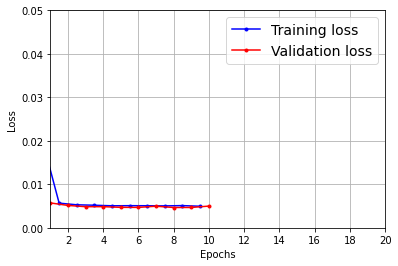

In [9]:
plot_learning_curves(history.history["loss"], history.history["val_loss"])
plt.show()

In [10]:
model.evaluate(X_valid, y_valid)

63/63 [==============================] - 0s 6ms/step - loss: 0.0050


0.0049898806028068066

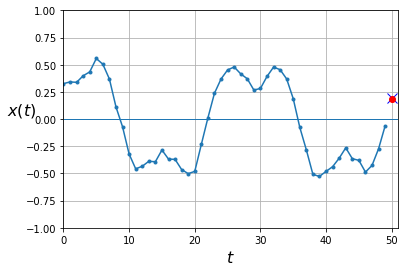

In [11]:
y_pred = model.predict(X_valid)
plot_series(X_valid[0, :, 0], y_valid[0, 0], y_pred[0, 0])
plt.show()

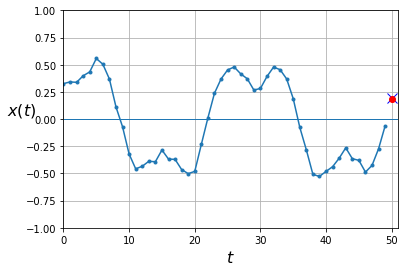

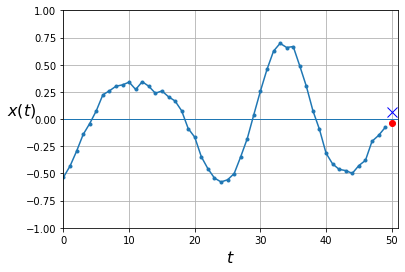

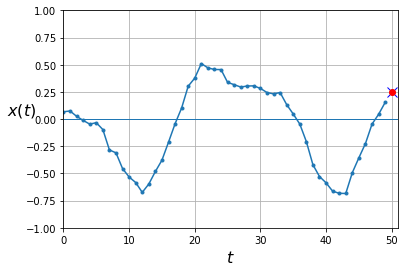

In [12]:
for i in range(3):
    plot_series(X_valid[i, :, 0], y_valid[i, 0], y_pred[i, 0])
    plt.show()


In [112]:

np.random.seed(1)
tf.random.set_seed(1)

X, Y = get_adding_problem_data(seq_length=16, num_samples=10000)


In [126]:
X[1]

array([[0.45954528, 0.        ],
       [0.96131726, 0.        ],
       [0.33418522, 0.        ],
       [0.47208342, 0.        ],
       [0.10539125, 0.        ],
       [0.50307591, 0.        ],
       [0.88568986, 0.        ],
       [0.53437734, 0.        ],
       [0.28147677, 0.        ],
       [0.35458469, 0.        ],
       [0.89628025, 0.        ],
       [0.24148914, 0.        ],
       [0.02388409, 0.        ],
       [0.9657268 , 0.        ],
       [0.4299679 , 0.        ],
       [0.34628852, 0.        ],
       [0.57706763, 0.        ],
       [0.12652616, 0.        ],
       [0.95004331, 0.        ],
       [0.31361083, 0.        ],
       [0.95283112, 0.        ],
       [0.21839323, 0.        ],
       [0.2487002 , 0.        ],
       [0.86380179, 0.        ],
       [0.23526833, 0.        ],
       [0.81510006, 0.        ],
       [0.54389724, 0.        ],
       [0.19126027, 0.        ],
       [0.58883994, 0.        ],
       [0.04813679, 0.        ],
       [0.

In [115]:
print(Y.shape)

print(X.shape)

(50000,)
(50000, 128, 2)


In [118]:

model = keras.models.Sequential([
    keras.layers.SimpleRNN(100,
                           return_sequences=True,
                           input_shape=[None, 2],
                           activation='relu',
                           recurrent_initializer='orthogonal'
                           #recurrent_initializer='identity'
                          ),
    #keras.layers.SimpleRNN(20,
    #                       return_sequences=True,
    #                       activation='relu',
    #                       recurrent_initializer='orthogonal'
    #                       #recurrent_initializer='identity'
    #                      ),
    keras.layers.SimpleRNN(1, activation='linear')
])
optimizer = keras.optimizers.Adam(learning_rate=0.001)#, clipvalue=10)
model.compile(loss="mse", optimizer=optimizer)
history = model.fit(X, Y, epochs=32, batch_size=32, validation_split=0.2)

Epoch 1/32
1250/1250 [==============================] - 69s 54ms/step - loss: 0.1927 - val_loss: 0.1728
Epoch 2/32
1250/1250 [==============================] - 71s 57ms/step - loss: 244686.2344 - val_loss: 0.1681
Epoch 3/32
1250/1250 [==============================] - 69s 55ms/step - loss: 0.1685 - val_loss: 0.1667
Epoch 4/32
1250/1250 [==============================] - 63s 50ms/step - loss: 0.1670 - val_loss: 0.1654
Epoch 5/32
1250/1250 [==============================] - 60s 48ms/step - loss: 0.1663 - val_loss: 0.1664
Epoch 6/32
1250/1250 [==============================] - 65s 52ms/step - loss: 0.1657 - val_loss: 0.1652
Epoch 7/32
1250/1250 [==============================] - 65s 52ms/step - loss: 0.1652 - val_loss: 0.1704
Epoch 8/32
1250/1250 [==============================] - 66s 52ms/step - loss: 0.1654 - val_loss: 0.1672
Epoch 9/32
1250/1250 [==============================] - 65s 52ms/step - loss: 0.1643 - val_loss: 0.1639
Epoch 10/32
1250/1250 [==============================] - 65

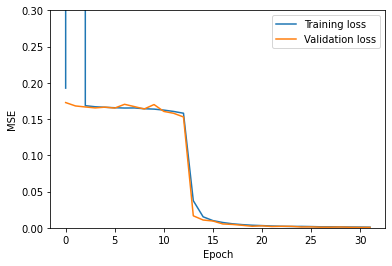

In [121]:
plt.plot(history.history["loss"], label='Training loss')
plt.plot(history.history["val_loss"], label='Validation loss')
plt.ylim([0.0,0.3])
#plt.semilogy()
plt.legend()
plt.ylabel('MSE')
plt.xlabel('Epoch')
plt.show()

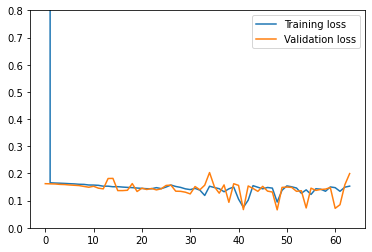

In [103]:
plt.plot(history.history["loss"], label='Training loss')
plt.plot(history.history["val_loss"], label='Validation loss')
plt.ylim([0.0000,0.8])
#plt.semilogy()
plt.legend()
plt.show()

In [124]:
X_test, Y_test = get_adding_problem_data(seq_length=128, num_samples=200)
model.evaluate(X_test, Y_test)

7/7 [==============================] - 0s 13ms/step - loss: 5.9759e-04


0.0005975926178507507

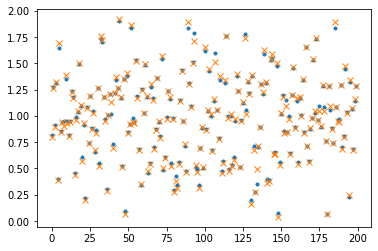

In [125]:
plt.plot(Y_test, '.')
plt.plot(model.predict(X_test), 'x')
plt.show()